In [1]:
import tensorflow as tf

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
tf.__version__

'1.14.0'

In [3]:
ls

tf2_1.ipynb  tf2_2.ipynb


In [4]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#importamos el dataset
data = keras.datasets.fashion_mnist

In [6]:
#lo hacemos asi porque load data va a 'botar' los datos de esta manera
(train_images,train_labels),(test_images, test_labels) = data.load_data()

In [7]:
#hay 10 labels
print(train_labels[6])

7


In [8]:
#vamos a crear una lista donde estan los nombres de los labels
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

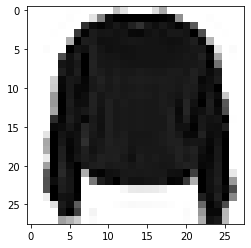

In [9]:
#para ver una imagen
plt.imshow(train_images[7],cmap=plt.cm.binary) #cmap=plt.cm.binary para verlo en blanco y negro
plt.show()

In [10]:
#normalizamos los datos, dividiendo los datos entre 255
train_images = train_images/255.0
test_images = test_images/255.0

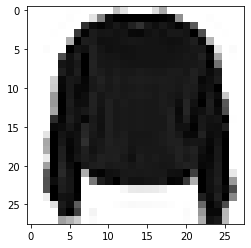

In [11]:
plt.imshow(train_images[7],cmap=plt.cm.binary) #cmap=plt.cm.binary para verlo en blanco y negro
plt.show()

In [12]:
#Creamos el modelo

In [13]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3211520   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
____

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5)

ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (60000, 28, 28)

In [ ]:
#test_loss, test_acc = model.evaluate(test_images,test_labels)
#print('Tested Acc:', test_acc)

## Using the model to make predictions

In [ ]:
prediction=model.predict(test_images)
for i in range(20):

    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel('Actual:'+class_names[test_labels[i]])
    plt.title('Prediction:'+class_names[np.argmax(prediction[i])])
    plt.show()